**Sales and Advertisin Dataset: https://www.kaggle.com/datasets/mahmoudshaheen1134/sales-and-advertising-clean-dataset/data**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, normalize
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = "/content/drive/MyDrive/3162-final_project/advertising_and_sales_clean.csv"
data = pd.read_csv(file_path)
print(data.head())

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83
3  83000.0  30020.03       6922.30       Mega  298246.34
4  15000.0   8437.41       1406.00      Micro   56594.18


**Data Pre Processing**

In [7]:
print(data.isnull().sum())

tv              0
radio           0
social_media    0
influencer      0
sales           0
dtype: int64


In [8]:
data = data.dropna()
data['tv'] = data['tv'].fillna(data['tv'].mean())

In [9]:
print(data.dtypes)

tv              float64
radio           float64
social_media    float64
influencer       object
sales           float64
dtype: object


In [10]:
data = pd.get_dummies(data, columns=['influencer'], drop_first=True)

Text(0, 0.5, 'Count')

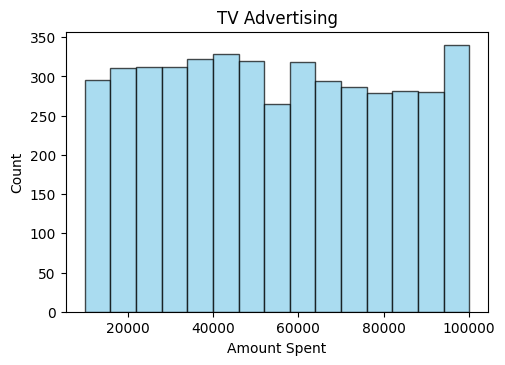

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(data['tv'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('TV Advertising')
plt.xlabel('Amount Spent')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

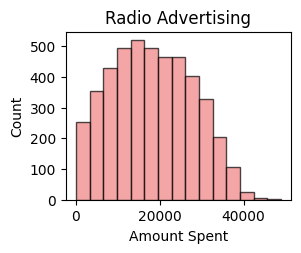

In [12]:
plt.subplot(2, 2, 2)
plt.hist(data['radio'], bins=15, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Radio Advertising')
plt.xlabel('Amount Spent')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

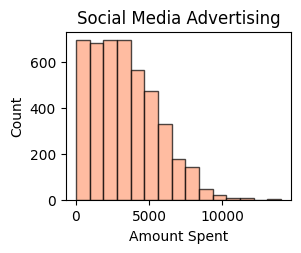

In [13]:
plt.subplot(2, 2, 3)
plt.hist(data['social_media'], bins=15, color='lightsalmon', edgecolor='black', alpha=0.7)
plt.title('Social Media Advertising')
plt.xlabel('Amount Spent')
plt.ylabel('Count')

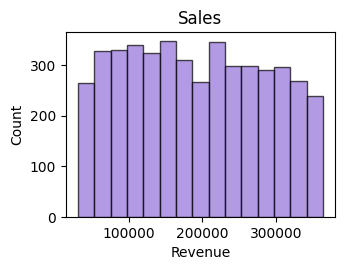

In [14]:
plt.subplot(2, 2, 4)
plt.hist(data['sales'], bins=15, color='mediumpurple', edgecolor='black', alpha=0.7)
plt.title('Sales')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [15]:
plt.figure(figsize=(18, 6))
plt.suptitle('Relationship Between Advertising Channels and Sales', fontsize=16)

Text(0.5, 0.98, 'Relationship Between Advertising Channels and Sales')

<Figure size 1800x600 with 0 Axes>

Text(0, 0.5, 'Sales ($)')

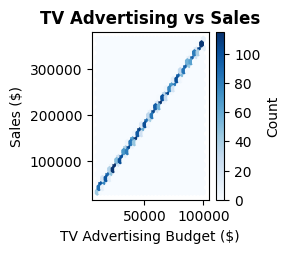

In [16]:
plt.subplot(2, 3, 1)
plt.hexbin(data['tv'], data['sales'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('TV Advertising vs Sales', fontsize=12, fontweight='bold')
plt.xlabel('TV Advertising Budget ($)')
plt.ylabel('Sales ($)')

<ipython-input-17-dfad189366ef>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  radio_mean_sales = data.groupby(radio_bins)['sales'].mean().reset_index()


Text(0, 0.5, 'Average Sales ($)')

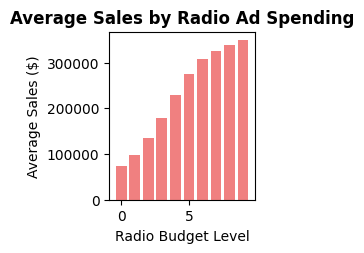

In [17]:
plt.subplot(2, 3, 2)
radio_bins = pd.cut(data['radio'], bins=10)
radio_mean_sales = data.groupby(radio_bins)['sales'].mean().reset_index()
plt.bar(range(len(radio_mean_sales)), radio_mean_sales['sales'], color='lightcoral')
plt.title('Average Sales by Radio Ad Spending', fontsize=12, fontweight='bold')
plt.xlabel('Radio Budget Level')
plt.ylabel('Average Sales ($)')

<ipython-input-18-145338cdeda0>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  social_media_mean_sales = data.groupby(social_media_bins)['sales'].mean().reset_index()


([], [])

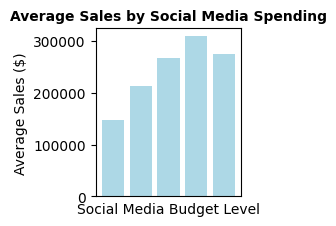

In [18]:
plt.subplot(2, 3, 3)
social_media_bins = pd.cut(data['social_media'], bins=5)
social_media_mean_sales = data.groupby(social_media_bins)['sales'].mean().reset_index()
plt.bar(range(len(social_media_mean_sales)), social_media_mean_sales['sales'], color='lightblue')
plt.title('Average Sales by Social Media Spending', fontsize=10, fontweight='bold')
plt.xlabel('Social Media Budget Level')
plt.ylabel('Average Sales ($)')
plt.xticks([])

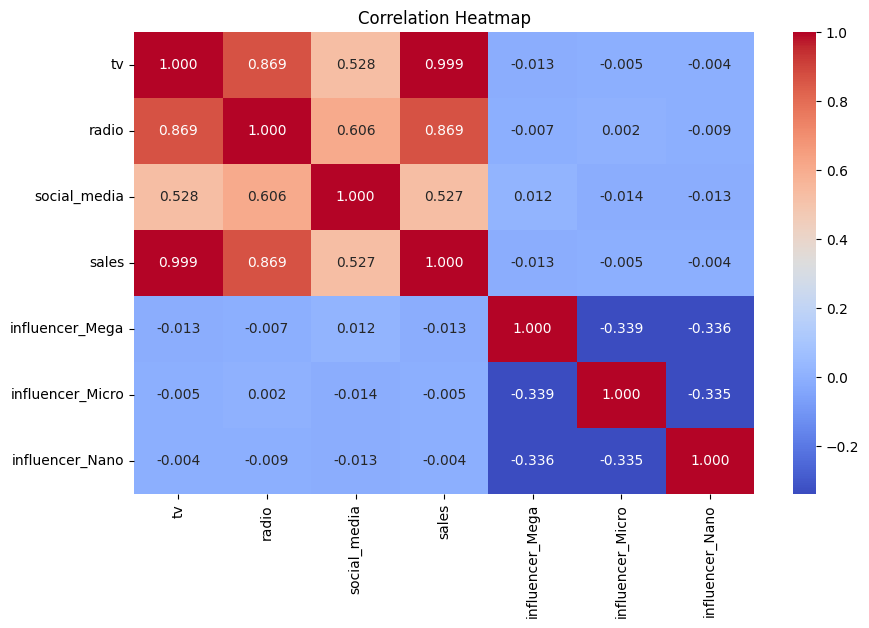

In [19]:
# Correlation Matrix, visualize how strongly each factor is related to each other
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Heatmap')
plt.show()

****
**Linear Regression**

In [20]:
X = data.drop('sales', axis=1)
y = data['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [23]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [24]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 8322668.25
Root Mean Squared Error: 2884.90
R² Score: 0.9990


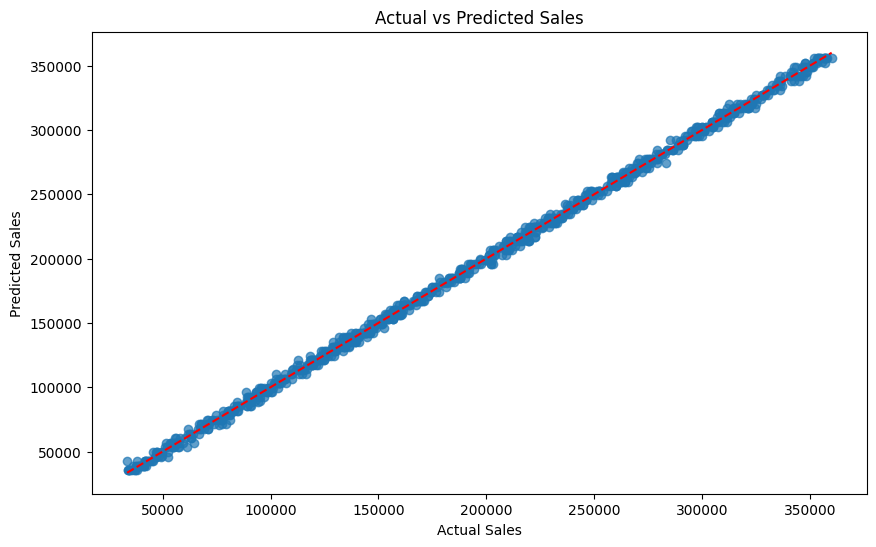

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

****
**Random Forest Regression**

In [26]:
# Create arrays for features and target
X = data.drop('sales', axis=1)
y = data['sales']

In [27]:
# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Create Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Make predictions based on the test data
y_pred_rf = rf.predict(X_test)

In [30]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("R² Score: ", r2)

Mean Squared Error (MSE):  11360327.00909977
Mean Absolute Error (MAE):  2739.236753736258
R² Score:  0.9986492535212415


In [31]:
# Calculate coefficient of determination to see how well the random forest model performed on the training data
# Since the testing R2 score is also high then this means the model generalizes well
coeff = rf.score(X_train, y_train)
print('Coefficient of Determination:', coeff)

Coefficient of Determination: 0.9998189133862997


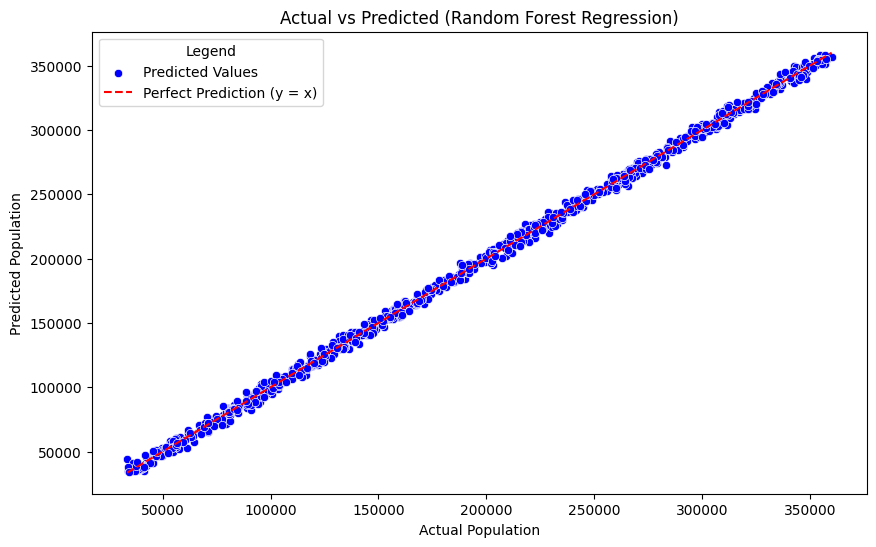

In [32]:
# Actual vs Predicted Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_rf, label="Predicted Values", color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', label="Perfect Prediction (y = x)")
plt.xlabel("Actual Population")
plt.ylabel("Predicted Population")
plt.title("Actual vs Predicted (Random Forest Regression)")
plt.legend(title="Legend")
plt.show()

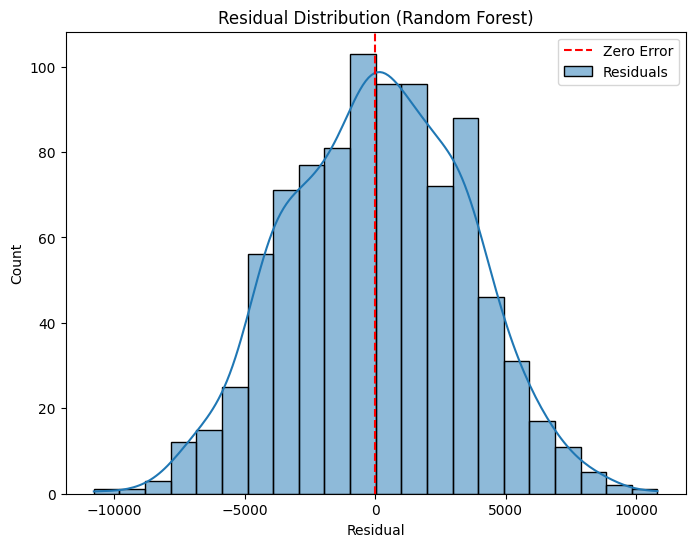

In [33]:
# Distribution of Residuals, /
# Since it is fairly normally distributed (bell curve centered around 0), the model is reliable.
y_pred_rf = rf.predict(X_test)
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(8,6))
sns.histplot(residuals_rf, kde=True, label="Residuals")
plt.axvline(0, color='red', linestyle='--', label="Zero Error")
plt.title("Residual Distribution (Random Forest)")
plt.xlabel("Residual")
plt.legend()
plt.show()

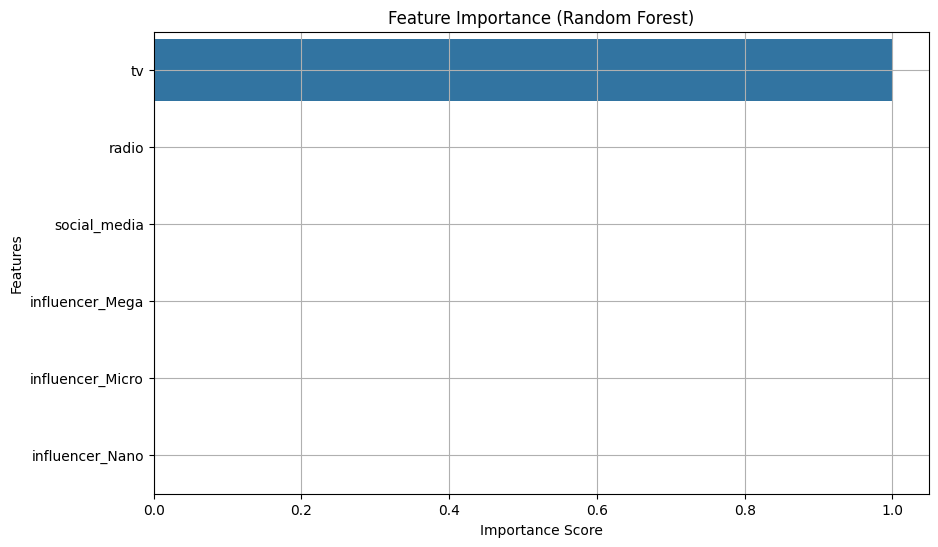

In [34]:
# Feature Importance Bar Chart
importances = rf.feature_importances_
features = X.columns if hasattr(X, 'columns') else [f"Feature {i}" for i in range(X.shape[1])]

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.grid(True)
plt.show()

****
**Support Vector Regression**

In [35]:
X = data.drop('sales',axis=1)
y = data['sales']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1000, epsilon=.1))
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"SVR RMSE: {rmse:.2f}")
print(f"SVR R² Score: {r2:.2f}")

SVR RMSE: 248154392.98
SVR R² Score: 0.97


In [38]:
r = np.sqrt(r2)
print(f"Coefficient of Correlation (R): {r:.4f}")

Coefficient of Correlation (R): 0.9851


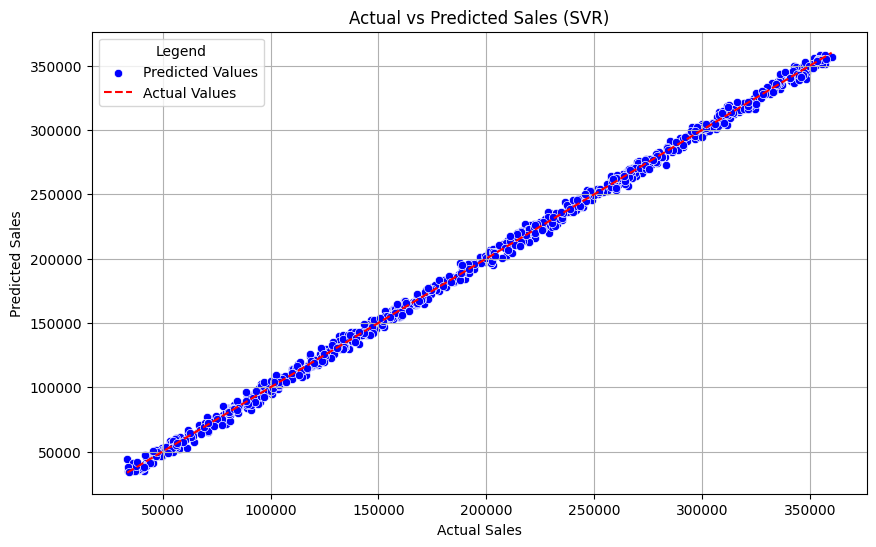

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, label='Predicted Values', color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--', label="Actual Values")
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (SVR)')
plt.legend(title="Legend")
plt.grid(True)
plt.show()

<ipython-input-40-6be2ebb7efba>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, color='blue', label='Actual Sales', shade=True)
<ipython-input-40-6be2ebb7efba>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, color='red', label='Predicted Sales', shade=True)


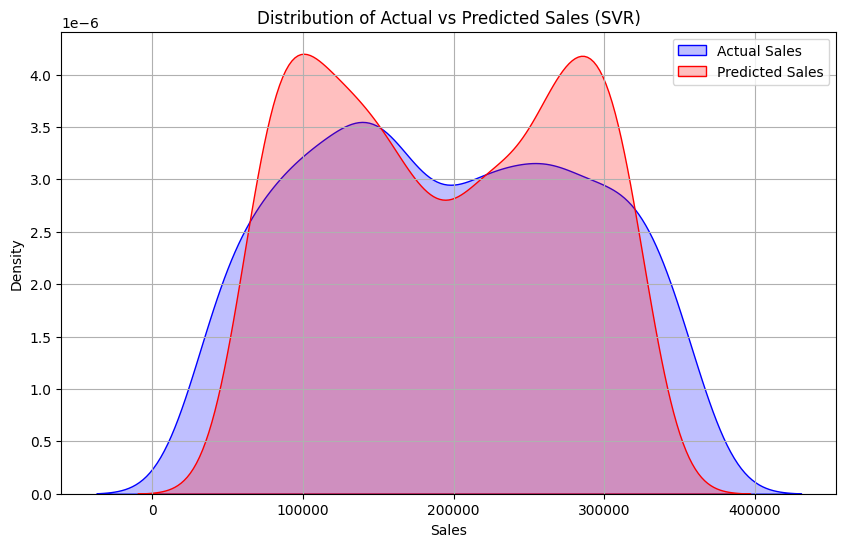

In [40]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='blue', label='Actual Sales', shade=True)
sns.kdeplot(y_pred, color='red', label='Predicted Sales', shade=True)

plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Distribution of Actual vs Predicted Sales (SVR)')
plt.legend()
plt.grid(True)
plt.show()